# Authors

This notebook was authored by Alya Bolowich and Max Koslowski with help from Sabina Bedn√°≈ôov√°. The original BW2 tutorial on which this is based can be found here: [Brightway2 tutorial](https://github.com/maximikos/Brightway2_Intro/blob/master/BW2_tutorial.ipynb). 

# Introductory note
<a id='section0'></a>
This is a [Jupyter Notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) with the purpose of making you familiar with the basic Python-based [Brightway25 LCA framework](https://documentation.brightway.dev/en/latest/index.html) and its various functionalities, all developed by Chris Mutel and colleagues.

This notebook is designed to get you started with creating your own project, setting up your database(s) (used as background systems) and simple foreground systems, performing your first impact assessments, analysing your results, and running Monte Carlo simulations in calculation setups.

Since Brightway2 builds on Python, a widely used programming language for scientific analysis, and can be installed easiest through the package and environment mangement system [*conda*](https://docs.conda.io/projects/conda/en/latest/), we need to get either [Anaconda](https://www.anaconda.com/), an open source distribution for multiple languages including Python and R, or at least [Miniconda](https://docs.conda.io/en/latest/miniconda.html), the bootstrap version of Anaconda. The full Anaconda installation contains, among others, a terminal and an IDE (integrated development environment). And, good for us, it natively installs the setup for Jupyter Notebooks, through which we can work most effectively with Brightway2. Both Jupyter and Brightway can also be installed through [*pip*](https://jupyter.readthedocs.io/en/latest/install.html#new-to-python-and-jupyter), but it may be a tad trickier.

For clarification: *conda* is, just like *pip*, a package and environment management system; the difference, however, is that "*pip* installs python packages within any environment; *conda* installs any package within conda environments." (quote from [here](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/))

<br>

---

**Recommended prerequisites are:**
* having installed [Brightway25](https://docs.brightway.dev/en/latest/content/installation/installation.html) + all relevant packages (make sure to do so in the correct virtual environment) and possibly even having had a first quick look at its [documentation](https://docs.brightway.dev/en/latest/index.html).
  <ins>
* knowledge of the foundations of life cycle assessment. If you don't have this knowledge (or simply need a refresher), have a look at the [online teaching resources](http://www.teaching.industrialecology.uni-freiburg.de/) provided by the Industrial Ecology Freiburg Group, led by Stefan Pauliuk.
* familiarity with any programming language - no Python-specific requirements, as most methods are quite intuitive and will be explained anyway. In case you are a total beginner, check [this](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%201%20AM/1%20-%20Python%20and%20notebook%20basics.ipynb) out :)

<br>

---

**For Jupyter newbies**

In a [Jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/index.html) everything is live and interactive. And, perhaps more interesting, markdown elements and actual code are mixed - and you can even include images, videos, and other formats. There are [many](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks), [many](https://rise.readthedocs.io/en/maint-5.5/index.html) things that you can do with such notebooks, and there are also many [cool](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) [tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) as well as some [extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions).

To get you started, you might want to press the `h`-key, which gives you an overview of keyboard shortcuts. Then, you have markdown (richt text containing) cells and code cells: if you hover over and select any cell by clicking on it (notice the blue bar on the left of the cell; turns green when you are in edit mode, i.e. having clicked into the cell box) you can turn it into either a markdown one by pressing `m` or into a code cell by pressing `y`; there are other types, too, but they are not relevant for what we want to do. Click on a cell to select it or simply use the arrow keys to navigate. If you want to run a cell, simply press `shift+enter`. And if you want to insert an empty cell above or below the current one, simply press `a` or `b`. For changing the contents of a cell, either doubleclick a markdown cell or click a code cell; pressing `enter` works, too. You can exit a cell using `Esc` and can copy, cut, and paste cells when pressing the keys `c`, `x`, and `v` when having selected a cell. As for the output of a command, note that clicking on it once makes it scroll-able, clicking on it twice results in hiding it.

You will notice further below that there are sometimes commands starting with `import`. These ones are needed to "import" the code of the respective package into the present code. For instance, by importing the Brightway2 package you enable the present notebook to use the Brightway2 functionalities. To have access to these packages, you need to download them first; otherwise you will receive an error message. You can download such packages in two ways: either in the notebook or in the terminal (make sure to be in the right virtual environment).

These are the absolute basics, but they are already more than what you need here.

<br>

---

**Recap on LCA**

To make sure we are on the same page, let's recapitulate the basics of LCA, expressed in a single formula (the notation may differ to the one that you are familiar with):

$$h = CBA^{-1}f$$

where: 

| Variable | Name (Heijungs & Suh 2001) | Brightway name | Dimensions | Mnemonic | Units of elements (example) | Brightway variable |
| --- | --- | --- | --- | --- | --- | --- 
| A | Technology matrix | Technosphere | p √ó p | **A**ctivities | kg coal per kWh electricity from coal power plant | lca.technosphere_matrix 
| B | Intervention matrix | Biosphere | q √ó p | **B**iosphere | kg CO2 directly emitted per kWh from coal power plant | lca.biosphere_matrix
| C | Characterization matrix | Methods | r √ó q | **C**haracterization | kg CO2 eq. per kg CH4 | lca.inventory |
| Œõ | Intensity matrix | | | | kg CO2 per kWh electricity from coal power plant, lifecycle | lca.demand_array |
| f | Final demand vector | Functional unit | p √ó 1 | | kWh electricity from coal power plant per final demand  |
| g | Inventory vector | | q √ó 1 | | kg CO2 per final demand |
| h | Impact vector | Scores | r √ó 1| | kg CO2 eq. per final demand |
| s | Scaling vector | Supply array | p √ó 1 | | kg coal per final demand | lca.supply_array |
---

Note that the technosphere matrix (commonly referred to as the "A matrix") must be square and invertible. 

Specific parts of the above formula have distinct names. Since these names are also used in the Brightway2-framework, we will note them down here:
- $f$... demand array
- $A{^-1}f$... supply array
- $BA{^-1}f$... inventory
- $CBA{^-1}f$... characterised inventory

To not only get a single score per impact category, we can diagonalise the supply array (how this can be realised in the Brightway25 framework is not shown in this notebook) so that we can see the environmental impacts per process:

$$h_{process} = CB~diag(A^{-1}f)$$

You can do the same for breaking down the total environmental impact to the stressors:

$$h_{stressor} = C~diag(BA^{-1}f)$$

Another way of representing your results is to show the environmental stressors per activity for a specific impact category:

$$h_{category} = diag(C)~B~diag(A^{-1}f)$$

<br>

---
**What's the difference between Brightway2 and Brightway25?**

For those who have used Brightway2, you may remember that data gets written to disk. With Brightway25, the goal is to migrate towards datapackages. This would allow you to store the data as a datapackage and later use the Python package bw2calc to run the data. Since Brightway25 is still in beta mode, this feature (and subsequent tutorials to do so) have not been fully implemented yet. One way to look at the difference is Brightway2 is more structure-centric, whereas Brightway25 is more data-centric. 

For now, this BW25 tutorial has added additional information/explanations from Max's original BW2 tutorial, but will not go into the datapackages in BW25. If you want to know more about that, check out Chris Mutel's tutorial ["from-the-ground-up"](https://github.com/brightway-lca/from-the-ground-up/blob/main/2%20-%20Building%20and%20using%20matrices%20in%20bw2calc.ipynb). Stay tuned for tutorials that will show you how to use Brightway25 to the fullest extent as new features get released! 

<p style='font-size: 18px; color:red; text-align: center;'><strong>NB! BW25 is </strong> <em>still under development</em> <strong>and new releases of different BW packages may induce breaking changes! </strong></p>

If you prefer a stable version (meaning, it will be the same tomorrow as it is today), either check out the [BW2 tutorial on which this one is based](https://github.com/maximikos/Brightway2_Intro/blob/master/BW2_tutorial.ipynb), or the [BW2 tutorial from the documentation](https://learn.brightway.dev/en/latest/content/notebooks/BW2_for_beginners.html).

<br>

---

**The notebook is structured as follows:**

1. [Setup of a project](#section1): *How to set up a project to work in*<br>
    1.1 [Instantiating your project](#section11)<br>
2. [Database import/setup](#section2): *How to import a database and get it ready for use*<br>
    2.1 [Importing biosphere flows](#section21)<br>
    2.2 [Importing a backend database](#section22)<br>
    2.3 [Database selection and a first look at activities](#section23)<br>
    2.4 [Importing a foreground dataset from Excel](#section24)<br>
3. [LCIA](#section3): *Basics of the LCIA calculations*<br>
    3.1 [LCIA method selection](#section31)<br>
    3.2 [Performing the LCA](#section32)<br>
4. [Multi-LCA](#section4): *How to compare multiple alternatives across multiple impact categories simultaneously*<br>
    4.1 [Visualization of MCLA results](#section41)<br>
5. [Basic contribution analysis](#section5): *How to examine the LCA results*<br>
6. [Brightway to LCA matrices correspondence](#section6)
7. [Deleting processes, databases, projects](#section7)

<br>

---

**Outcomes - what are we going to learn?**

By completing this notebook (run it locally on your machine and don't just read the code), we will:
- have understood the basics of the Brightway25 LCA framework
- know how to import/generate/handle datasets in Brightway25
- be able to run simple LCAs (both linearly and in parallel)
- be able to analyse a product system and the results of an LCA
- know the contribution analysis of a product
- be able to visualise data in form of tables and figures

What will come in the future?
- tutorial on datapackages and using parameters (parameters are addressed in Max's BW2 tutorial)
- tutorial with better detail for visualizing contribution analyses

<br>

---

Just for clarification, abbreviations used in the markdown cells of this notebook are:

| Abbreviation(s) | Written out |
| --- | --- |
| bw, BW25 | Brightway25 |
| FU | Functional unit |
| LCA | Life cycle assessment |
| LCI | Life cycle inventory |
| LCIA | Life cycle impact assessment |
| EI| Ecoinvent |
| db| database |
---

If you're super keen then you might also be interested in checking out the **[Activity Browser](https://github.com/LCA-ActivityBrowser/activity-browser)** which is a graphical user interface for Brightway2 (currently being updated with Brightway25). 

<br>

---

<a id='section1'></a>
# 1. Setup of a project

A project gets instantiated and relevant libraries/packages imported. 

In [1]:
# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import bw2data as bd
import bw2io as bi

# Import other packages we will need
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Let's check out BW versions
print("bw2data version", bd.__version__)
print("bw2io version", bi.__version__)

bw2data version (4, 0, 'DEV40')
bw2io version 0.9.DEV27


In [3]:
bd.projects.delete_project("bw25-tuto",delete_dir=True)

'default'

Let's list the available projects.

In [4]:
# If you're just starting out, this should only have the project "default" in it.
# Else, you'll see all the previous projects you've worked on.
bd.projects

Brightway2 projects manager with 12 objects:
	USLCI
	USLCI_FY23_Q2_4_ne
	commect
	commect-bw2
	default
	dyplca
	ecoinvent391
	plca-autumn-school
	terra
	test-from-new
	tractor_lci
	uslci_importer_test
Use `projects.report()` to get a report on all projects.

We can see where our projects are stored. Not essential to run your LCA, but good to know.

In [6]:
# This line of code will print a path you can navigate to to find your data.
bd.projects.dir

<a id='section11'></a>
### 1.1 Instantiating your project

Whether you want to create a new project or work with an existing one, the following line of code will be the same. You **must** execute the bd.projects.set_current() command **_before_** importing the biosphere flows (or progressing further for that matter)!

If you're starting a new project, give it a name. Else, add the name of an existing project you want to continue working on.

In [5]:
name = "bw25-tuto"
bd.projects.set_current(name)

In [6]:
# Confirm that your project has been registered
bd.projects

Brightway2 projects manager with 13 objects:
	USLCI
	USLCI_FY23_Q2_4_ne
	bw25-tuto
	commect
	commect-bw2
	default
	dyplca
	ecoinvent391
	plca-autumn-school
	terra
	test-from-new
	tractor_lci
	uslci_importer_test
Use `projects.report()` to get a report on all projects.

<a id='section2'></a>
# 2. Database import/setup

<a id='section21'></a>
### 2.1 Importing biosphere flows

We will now add our first database to the project. Let's see what databases we have:

In [7]:
# If this is your first time using this BW25 project, this should be an empty dictionary!
bd.databases

Databases dictionary with 0 objects

We will now import the biosphere matrix to our project. If this is the first time you've set up the project, you need to install the biosphere flows. You do not need to run this subsequent times.

In [8]:
bi.bw2setup()

Creating default biosphere

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4709/4709 [00:00<00:00, 34966.58it/s]


Vacuuming database 
Created database: biosphere3
Creating default LCIA methods

Wrote 762 LCIA methods with 227223 characterization factors
Creating core data migrations



Check that you now see the biosphere database in your dictionary. 

In [9]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	biosphere3
	ecoinvent-391-cutoff

<a id='section22'></a>
### 2.2. Importing a backend database

<a id='section22a'></a>
#### 2.2.a Importing ecoinvent

LCA draws on a lot of background data. Those can be found in numerous databases, one of which being ecoinvent. Let's import it now! <br> You'll need to have the path to your ecoinvent database and a name that you'll use for it. The EI database will need to be **unzipped** and the the path should end at the **datasets** folder (e.g. "/ecoinvent 3.9.1_cutoff_ecoSpold02/datasets"). 

In [10]:
EI_DB_PATH = "path_to_your_file_containing/ecoinvent 3.9.1_cutoff_ecoSpold02/datasets"

You will also need to give your database a name. This name will appear in when you call `bd.databases`. Note that your foreground inventory will need to match background processes to the database with the same name. For example, your FG inventory processes cannot link to a background named "EI-391" if you import the background as "ecoinvent-391-cutoff". They must share the same name.

In [140]:
DB_NAME = "ecoinvent-391-cutoff"

In [13]:
# # When we execute this cell, we will check if it's already been imported, and if not (else) we import it.

if db_name in bd.databases:
    print("Database has already been imported.")
else:
    # Go ahead and import:
    importer = bi.SingleOutputEcospold2Importer(EI_DB_PATH, DB_NAME)
    # Apply stragegies
    importer.apply_strategies()
    # We can get some statistics
    importer.statistics()

##### What does it mean to apply strategies? 

Strategies are processes that will convert the database into something that Brightway can use. You do not need to deal with these yourself, however, you may find that the program fails because of unlinked exchanges. This is typically not a problem when importing ecoinvent, but may come up when you import your foreground (we'll get to that).

Once we know the database has no unlinked exchanges, we can go ahead and write it to disk.

In [14]:
# Write the database into our project
importer.write_database()

In [15]:
# Check that our database was correctly imported
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	biosphere3
	ecoinvent-391-cutoff

#### Using ecoinvent interface

There is a  relatively new package (Oct 2023) called [ecoinvent_interface](https://github.com/brightway-lca/ecoinvent_interface). This allows you to easily import ecoinvent into your BW25 project in only a few lines without needing a local copy of the database. Attached below is a sample code  from a [gist made by Tom√°s Navarrete](https://gist.github.com/tngTUDOR/947f60a5ed965d8d1135b5e4eb5455a3).

```
import bw2data as bd
import bw2io as bi
from packaging import version
# We need bw2io version 0.9.dev24 at least
assert version.parse(".".join([str(i) for i in bi.__version__])) >= version.parse("0.9.DEV24")

EI_USERNAME = "my_user"
EI_PASSWORD = "somepassword"

# Let's make the credentials be stored somewhere so that we don't need to provide them every time
# This is only necessary once, and is optional (see below)
# you might need to install ecoinvent_interface package with: `pip install ecoinvent_interface`

from ecoinvent_interface import Settings, permanent_setting
permanent_setting("username", EI_USERNAME)
permanent_setting("password", EI_PASSWORD)
# Secrets files read automatically
my_settings = Settings()

# Now to the magic part: download and install ecoinvent 3.9.1 cutoff
bd.projects.set_current("some new project")
bi.import_ecoinvent_release(
    version="3.9.1",
    system_model="cutoff",
  # Only use the credentials if you didn't add them using the Settings object of ecoinvent_interface above.
    #username=EI_USERNAME,
    #password=EI_PASSWORD,
)
```

<a id='section22b'></a>
#### 2.2.b Importing Agribalyse database
<p style="color:#6495ED;"> Under construction...

<a id='section22c'></a>
#### 2.2.c Importing FORWAST database
<p style="color:#6495ED;"> Under construction...

<p style="color: red; font-weight: bold; ">IMPORTANT NOTE </p>
In this example, we will use data from ecoinvent. In case you do not have access to it, do not worry - you can complete almost the whole notebook with the free FORWAST database, too. You would only have to change the database selection in each respective cell from 'eidb.' to 'fw.'(abbreviations taken from below). Mind that you would also have to undertake manual changes in the Excel spreadsheet for making the respective import work. Also, mind that the FORWAST data differs to the one of ecoinvent; this, however, affects only few of your commands further below (e.g. finding activities by name etc.). If you want to work with data from other sources, e.g. Agribalyse, please see the respective strategies for their data import.

<a id='section23'></a>
## 2.3 Database selection and a first look at activities

If our database of choice is already included, then we just make use of it directly. For convenience, we need to assign a variable to it so that the database can be worked with more easily.

In [141]:
eidb = bd.Database(DB_NAME)
eidb

# If using FORWAST
fwdb = bd.Database("forwast")  # or whatever name you chose for this DB

We can also check up on the type and length of our imported database.

In [142]:
print(
    "The imported ecoinvent database is of type {} and has a length of {}.".format(
        type(eidb), len(eidb)
    )
)

The imported ecoinvent database is of type <class 'bw2data.backends.base.SQLiteBackend'> and has a length of 21238.


And we can even visualise our technospheres:

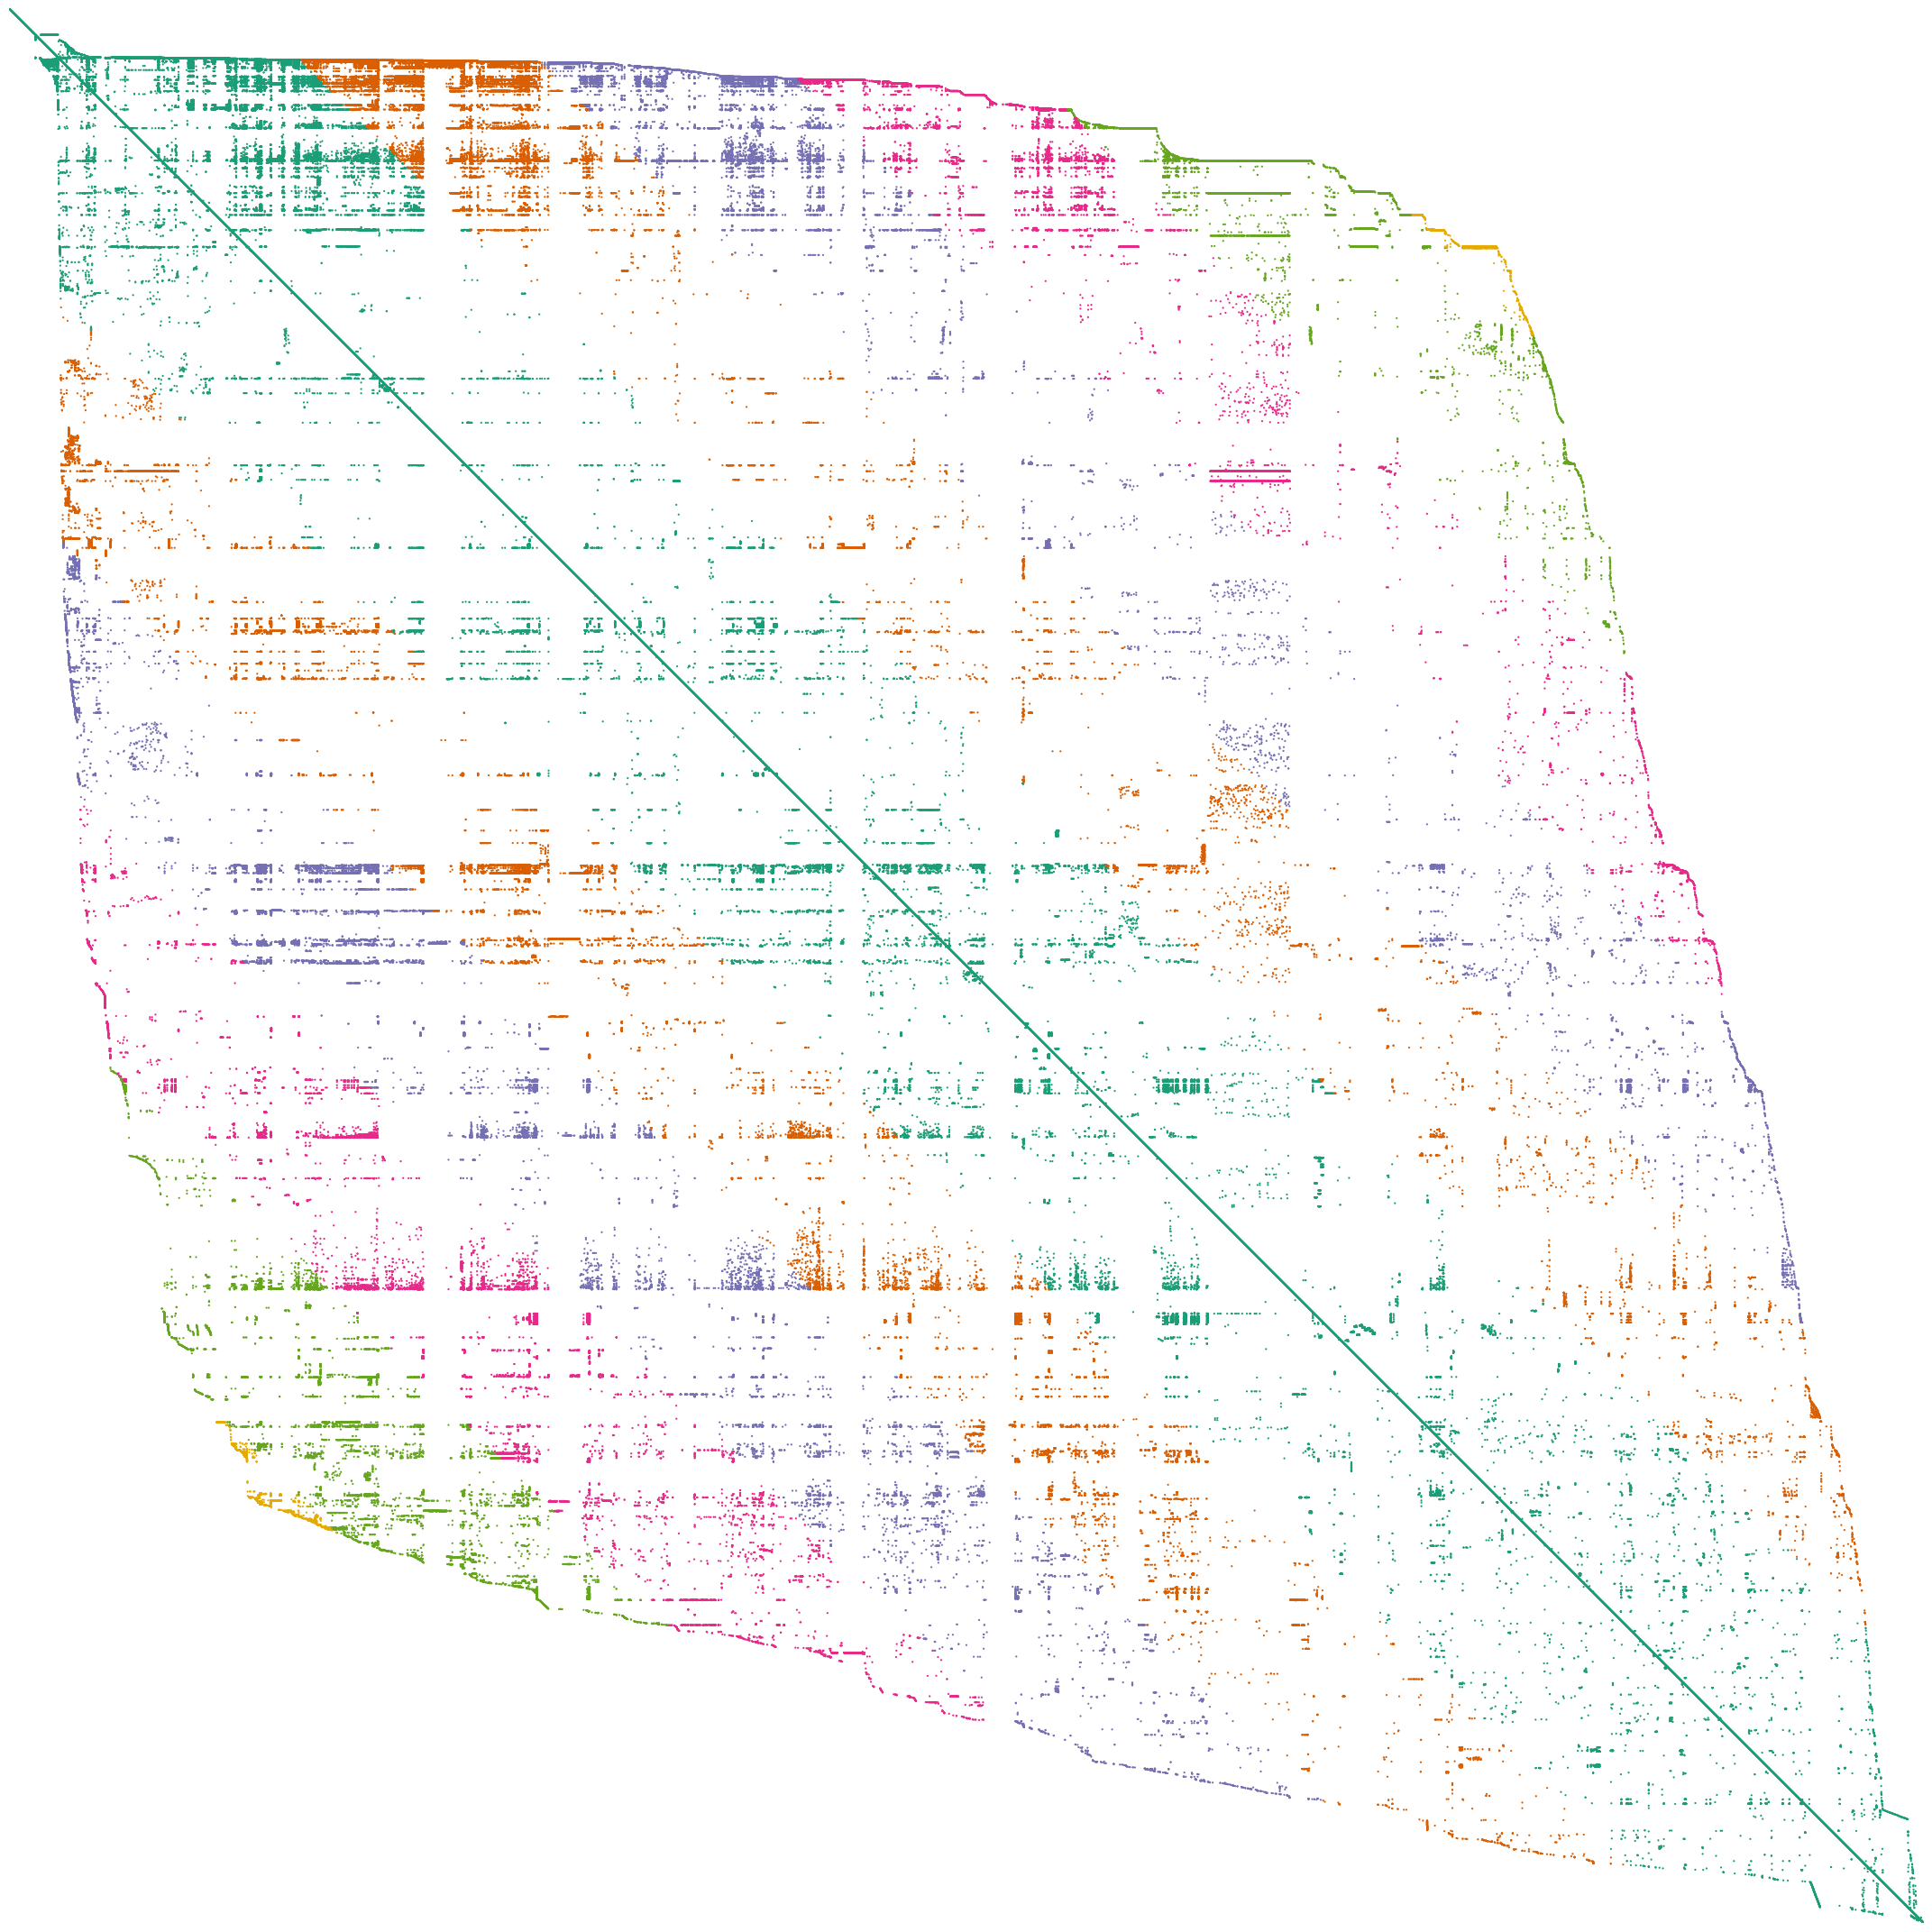

In [18]:
# Be patient, this can take a couple seconds ;)
eidb.graph_technosphere()

Nice graphic! But it doesn't really tell us much... Let's have a bit of a closer look at what our database contains. We can, for instance, examine a random process of the imported ecoinvent database by doing the following:

In [19]:
random_act = eidb.random()
# random_act.as_dict()

To get an overview of all exchanges of the selected process, type:

In [20]:
for exc in random_act.exchanges():
    print(exc)

Exchange: 1.0 unit 'uranium conversion facility construction' (unit, US, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 11520.0 kilogram 'market for aluminium, cast alloy' (kilogram, GLO, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 24480.0 kilogram 'market for aluminium, wrought alloy' (kilogram, GLO, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 3710.0 cubic meter 'market for concrete, normal strength' (cubic meter, RNA, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 110000.0 kilogram 'market for copper, cathode' (kilogram, GLO, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 2800000000.0 megajoule 'market for diesel, burned in diesel-electric generating set, 10MW' (megajoule, GLO, None) to 'uranium conversion facility construction' (unit, US, None)>
Exchange: 1280000.0 kilowatt hour 'market group for electricity, mediu

And if you want to get more information on one specific exchange of the chosen process, do:

In [21]:
# Change the numeral to check out the other exchanges (as from the list above)
[exc for exc in random_act.exchanges()][0].as_dict()

{'flow': 'd8afdb35-66b5-4967-ad31-3c75984b852c',
 'type': 'production',
 'name': 'uranium conversion facility',
 'classifications': {'CPC': ['53269: Other constructions for manufacturing']},
 'production volume': 0.0349148297619048,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'},
  'price': {'amount': 55559753.90415085,
   'comment': 'Calculated based on inputs: The price of the product has been calculated as a sum of the values of the material and energy inputs for this product. This value is therefore a rough estimation. It may underestimate the real price since there are additional expenses when producing any product. These expences can include for example labour costs, treatment of waste materials and profit for the producer. Please consider carefully whether this level of data quality is acceptable for your application.',
   'unit': 'EUR2005'}},
 'activity': 'aaba3bf4-6691-5044-b23a-96d4c2057b6f',
 '

Sometimes it can also be helpful to have some activity characteristics at hand, for instance if you want to search a database using an activity's code or want to get an activity's name when only having its key...

In [22]:
# Getting an activity's code
random_act["code"]

'027bad1635fad303d73d7ae4b178be0d'

In [23]:
# Getting an activity's name through its code
eidb.get(random_act["code"])

'uranium conversion facility construction' (unit, US, None)

In [24]:
# Getting an activity's key
random_act.key

('ecoinvent-391-cutoff', '027bad1635fad303d73d7ae4b178be0d')

In [25]:
# Getting an activity's name using its key
bd.get_activity(random_act.key)

'uranium conversion facility construction' (unit, US, None)

<a id='section24'></a>
## 2.4 Importing a foreground dataset from Excel

In addition to the import of a standard background database, we can also create a database, like a bespoke foreground. There are several file types that work when developing a foreground inventory, one of them being Excel.

This works relatively smoothly, provided the Excel workbook is created correctly. Here, we import a flawless dataset, but it may be that you have a dataset that has some inconsistencies in the import. In that case, check that the units in the foreground match those in the background database (1L of diesel vs 1kg of diesel would be a fault, for example), check your reference products are correct for the database you are referencing, look for spelling errors, ... You should also check that your template layout (like row spacing, columns used) matches the template perfectly.

If you have a foreground database with several activites that calls on data from other databases that you have created, _all_ of the databases will need to be added. For example, there's one database, "car_db" that contains a process, "car", and "car" contains processes "body" and "wheels" from the database "parts_db", you need to execute the following code for both of these databases.

In [26]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	biosphere3
	ecoinvent-391-cutoff

OK this is a small example, so it looks like everything is wrong! In fact, only one input was incorrect: the unit for aluminium scrap. I sneakily changed this to square meter instead of kilogram. Since there are lots of processes that rely on this input in one way or another, nothing matched. Let's fix this and try again.

<a id='section241'></a>
### 2.4.1 Matching the database

Why do we match the our database (fg_db in this case) to itself? We are trying to match the activites we've imported to each other, so this matches all the foreground databases we have.

#### Download the DB
<p  style="color: red"> ** FOR MICHAEL WEINOLD **  </p>
{download}`You can download the example database here. <https://github.com/alyabolowich/bw25-tuto/blob/main/excel_importer_example.xlsx>`


In [147]:
fg_db = "excel_importer_example.xlsx"
lci = bi.ExcelImporter(fg_db)

Extracted 2 worksheets in 4.14 seconds


Now we match our foreground to itself. This means all that activities we made using other activities in our dataset will get matched. We should match on fields that will make the dataset unique to ensure independent flows. You **must** execute `.apply_strategies()` before matching the databases.

In [148]:
# Match fg_db to itself
lci.apply_strategies()
lci.match_database(fields=["name", "unit", "reference product", "location"])

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.29 seconds
Applying strategy: link_iterable_by_fields


Now we match our foreground to our background (ecoinvent). We should match the foreground to the ecoinvent database using the "reference product" as well because we may have some products that have several outputs (one process but 2 outcomes of the same unit)

In [149]:
# Need to match fg_db to ecoinvent
lci.match_database(
    "ecoinvent-391-cutoff", fields=["name", "unit", "location", "reference product"]
)

Applying strategy: link_iterable_by_fields


Now we match our foreground to the biosphere flows.

In [150]:
lci.match_database("biosphere3", fields=["name", "categories", "location"])

Applying strategy: link_iterable_by_fields


Let's get some statistics from our dataset and check that everything imported correctly. We should have 0 unlinked exchanges. 

In [151]:
lci.statistics()

2 datasets
5 exchanges
0 unlinked exchanges
  


(2, 5, 0)

Great! our statistics show we have no unlinked exchanges, that means everything got imported well. We can go ahead and write our database to the disk.

In [32]:
lci.write_database()

Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 11428.62it/s]

Vacuuming database 


Created database: Water bottle LCA


Check that the fg_db is now written to disk

In [33]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	biosphere3
	ecoinvent-391-cutoff

There we go! 

<a id='section242'></a>
### 2.4.2 Unlinked exchanges

Let's take a small deviation to address unlinked exchanges and what these mean. You'll inevitably come across them as you develop with Brightway.

##### What are unlinked exchanges?  
These are activities that are not connected to any other activities or elementary flows (flows contained in the biosphere). Most often, when we create foreground matrices, these come from some fault of the user (unit error, incorrect template format, spelling error, ...). We can find these errors by calling the function `"write_excel()"`. 

Or, on a deeper level, this could be because there are some biosphere flows used in ecoinvent (our database we're using) that do not exist in the BW25 biosphere3 database (and, consequently, in the BW25 LCIA methods). The best we can do is to import these unlinked flows into another biosphere database. In this case, you'd need to run the line `importer.add_unlinked_flows_to_biosphere_database()`, and then re-import your ecoinvent database. If these flows are important to you, you should do further matching or modify the relevant LCIA methods to include them.

The cells have been converted to "raw" format. You'll see that they have been executed, but you cannot 

In [34]:
# Include the path to the foreground database
fg_db_u = "excel_importer_example_w_unlinked.xlsx"

# Import your LCI
lci = bi.ExcelImporter(fg_db_u)

Extracted 2 worksheets in 5.66 seconds


In [35]:
# Need to match FG_DB to itself
lci.apply_strategies()
lci.match_database(fields=["name", "unit", "reference product", "location"])

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.22 seconds
Applying strategy: link_iterable_by_fields


In [36]:
# Need to match FG_DB to ecoinvent
lci.match_database(
    "ecoinvent-391-cutoff", fields=["name", "unit", "location", "reference product"]
)

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.19 seconds
Applying strategy: link_iterable_by_fields


In [37]:
# Need to match biosphere database
lci.match_database("biosphere3", fields=["name", "categories", "location"])

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 6.47 seconds
Applying strategy: link_iterable_by_fields


In [38]:
lci.statistics()

2 datasets
5 exchanges
1 unlinked exchanges
  Type technosphere: 1 unique unlinked exchanges


(2, 5, 1)

Oh no! An unlinked exchange!! Let's try to localize it...

In [39]:
# Find unlinked flow(s)
for u in lci.unlinked:
    print(u)

# The following line of code also works:
# list(lci.unlinked)

{'name': 'water bottle production', 'amount': 0.005, 'unit': 'piece', 'database': 'Water bottle LCA', 'categories': ('None',), 'location': 'RER', 'type': 'technosphere', 'reference product': 'water bottle', 'uncertainty type': 5, 'loc': 0.005, 'minimum': 0.0005, 'maximum': 0.05}


You can check whether the import went as expected by having a look at an Excel sheet, that includes our process data. The location of this file is given as output of the following line of code. You can then find the excel (generally in your local folder) to find whether all the activites in your database correctly matched. Your local folder may be a hidden folder (like .local).

In [152]:
# This will output a file path.
lci.write_excel()

Let's look at the file (use your terminal to `cd` into the `.local` folder and navigate to the `output` folder containing the Excel file):

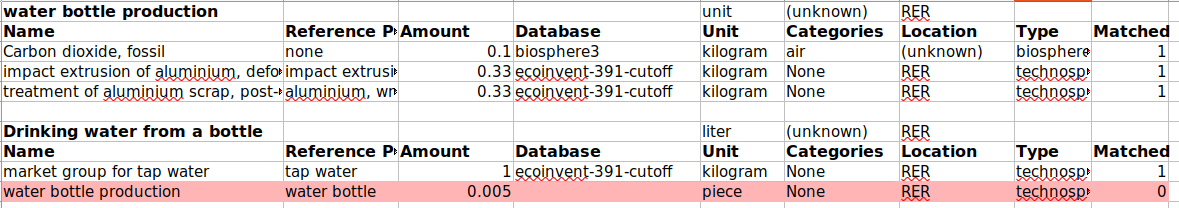

We can see that one activity, water bottle production, did not match. And I think I know why üòè The unit value is not correct. We accidentally assigned the it the unit value "piece", when we had originally constructed our water bottle production activity to be per "unit" created. 

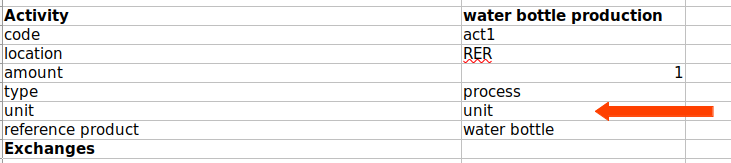

Unlinked exchanges can happen for a variety of reasons, almost always a user fault. Double-check your spelling, capitalizations, hyphenations, reference products, units used, and ensure you have the correct template format. This should help reduce the occurrence of unlinked exchanges. 

Since we didn't write this to our disk (`bd.write_database()`), we have not saved the database. We can proceed with our correctly imported foreground from here on out. 

In [107]:
# Should you have a problem with "unlinked exchanges" when importing ecoinvent or your background DB
# ei_importer = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
# ei_importer.add_unlinked_flows_to_biosphere_database()
# ei_importer.apply_strategies()
# ei_importer.statistics()
# ei_importer.write_database()

<a id='section243'></a>
### 2.4.3 Exploring our foreground database

Let's look around and explore the activities stored in our database before moving further. 

We can iterate through all of our activites in our database. You probably don't want to run this if you have many many activities :)

In [42]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	biosphere3
	ecoinvent-391-cutoff

In [43]:
wb = bd.Database("Water bottle LCA")

# Print all activities that are in our water bottle database.
for act in wb:
    print(act)

'Drinking water from a bottle' (liter, RER, None)
'water bottle production' (unit, RER, None)


We can think of our database as a graph, where we can link our activities (nodes) via exchanges (edges). 

Let's take a look at the exchanges for one activity in the database. 

In [44]:
# Get one activity from the database "water bottle". In this case, we get the 0th (or "first") one.
our_activity = [act for act in wb][0]
print(our_activity)

'Drinking water from a bottle' (liter, RER, None)


In [45]:
# Print all the exchanges for our activity
for exc in our_activity.exchanges():
    print(exc)

Exchange: 0.005 unit 'water bottle production' (unit, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>
Exchange: 1 kilogram 'market group for tap water' (kilogram, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>


In [46]:
# We can also put the exchanges in a list if we want
[e for e in our_activity.exchanges()]

[Exchange: 0.005 unit 'water bottle production' (unit, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>,
 Exchange: 1 kilogram 'market group for tap water' (kilogram, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>]

See whether the details of our biosphere exchange are correct:

In [47]:
act = [act for act in wb if "water bottle production" in act["name"]][0]
print(act)

# Get a specific exchange (CO2 in this case) of an activity
[exc for exc in act.exchanges() if "Carbon dioxide" in str(exc)][0].as_dict()

'water bottle production' (unit, RER, None)


{'name': 'Carbon dioxide, fossil',
 'amount': 0.1,
 'unit': 'kilogram',
 'database': 'biosphere3',
 'categories': ('air',),
 'type': 'biosphere',
 'reference product': 'none',
 'uncertainty type': 0,
 'input': ('biosphere3', '349b29d1-3e58-4c66-98b9-9d1a076efd2e'),
 'output': ('Water bottle LCA', 'act1')}

In [48]:
# We can also find an activity by its code.
activity_by_code = wb.get("act2")
activity_by_code

'Drinking water from a bottle' (liter, RER, None)

You can check if `activity_by_code` is correct by looking at the activity code "act2" in our Excel file.
<img src="check-activity.png"
     alt="activity" />

<a id='section3'></a>
# 3. LCIA

Before continuing with a simple product system example, the basics of the inventory caluclation shall be introduced. First, let's have a look at which LCIA methods we can access.

<a id='section31'></a>
### 3.1 LCIA method selection

Let's list all the methods.

In [49]:
# If you want a list of all methods, remove the [:5]. This is only to show you the first five elements in the list (it's very long...)
list(bd.methods)[:5]

# or use the built-in method (add [:5] at the end to only see the first five elements)
# bd.methods.list

# or the following
# bd.methods.items()

[('CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT')]

Ok, we see that there are quite a few methods that we could use for our LCA. Can we get more details on them? Sure we can! Those details are stored as values (`bd.methods.values()`), with the method names being the keys (`bd.methods.keys()`):

In [50]:
# Let's just check for the first two methods
for key in list(bd.methods)[:2]:
    print(key, ":", bd.methods[key])

('CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg SO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltaa.9326888b5dfc8ad763461e87dc5a0a9e', 'num_cfs': 21, 'geocollections': ['world']}
('CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT') : {'description': '', 'filename': 'LCIA_Implementation_3.9.xlsx', 'unit': 'kg CO2-Eq', 'abbreviation': 'cml-v48-2016-no-ltcg.ef26e472ac5329eeba834f793ba181a9', 'num_cfs': 149, 'geocollections': ['world']}


Now, let's select a some LCIA methods to be applied in an inventory calculation. The following line of code will return a list containing all methods that match our criteria of "climate change".

In [51]:
CC_methods = [m for m in bd.methods if "climate change" == m[1]]
CC_methods

[('CML v4.8 2016', 'climate change', 'global warming potential (GWP100)'),
 ('Ecological Scarcity 2021',
  'climate change',
  'global warming potential (GWP100)'),
 ('EF v3.0', 'climate change', 'global warming potential (GWP100)'),
 ('EF v3.1', 'climate change', 'global warming potential (GWP100)'),
 ('IMPACT 2002+ (Endpoint)', 'climate change', 'climate change'),
 ('IMPACT 2002+ (Endpoint)', 'climate change', 'total'),
 ('IPCC 2013',
  'climate change',
  'global temperature change potential (GTP100)'),
 ('IPCC 2013',
  'climate change',
  'global temperature change potential (GTP20)'),
 ('IPCC 2013', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2013', 'climate change', 'global warming potential (GWP20)'),
 ('IPCC 2021',
  'climate change',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021',
  'climate change',
  'global temperature change potential (GTP50)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021', 'clim

In [52]:
# We will use the EF v3.1 method in our LCIA calculations
ef_gwp_key = [
    m for m in bd.methods if "climate change" == m[1] and "EF v3.1" == m[0]
].pop()
print(ef_gwp_key)

# We can look at the method details
ef_gwp_method = bd.Method(ef_gwp_key)
print(ef_gwp_method)

('EF v3.1', 'climate change', 'global warming potential (GWP100)')
Brightway2 Method: EF v3.1: climate change: global warming potential (GWP100)


<a id='section32'></a>
### 3.2 Performing the LCA

In the next cell, we will execute 4 lines of code to perform our LCA - yep, just 4 lines! Let's get a breakdown of what is going on here:

`bc.LCA({our_activity: 1}, ef_gwp_key)`: we create an LCA 'object' that requires the demand of our LCA (functional unit) and the method as a tuple <br>
`lca.lci()`: Calculates the life cycle inventory from technosphere and biosphere matrices based on the demand<br>
`lca.lcia()`: Calculates the impact by multiplying the characterization matrix from our chosen method with the LCI matrix created in the prior line of code.<br>
`lca.score()`: Returns the LCA score

In [53]:
lca = bc.LCA({our_activity: 1}, ef_gwp_key)
lca.lci()
lca.lcia()
lca.score

0.002428811750776985

Cool! We got some results :) But calculating the LCA results for an individual activity and individual impact category is going to be tedious if we have lots of activities and impact categories to look into. Let's step into the world of MultiLCA.

<a id='section4'></a>
## 4. MultiLCA

We can use MultiLCA to calculate the LCA for 1 activity and N methods, N activites and 1 method, or N activities and N methods. Let's see how to do the first and last examples.

#### Calculate 1 activity for N methods

In [54]:
# Get list of N methods
ef_methods = list(filter(lambda x: "EF v3.1 no LT" in x[0], list(bd.methods)))
print("We have", len(ef_methods), "EF v3.1 no LT methods we will evaluate.")

We have 25 EF v3.1 no LT methods we will evaluate.


In [55]:
# Let's look again at all our activities
for act in wb:
    print(act["code"])

# Get details on our database
print(wb)

act1
act2
Brightway2 SQLiteBackend: Water bottle LCA


In [56]:
# The activity must be of type list.
acts_1 = [{bd.get_activity(("Water bottle LCA", "act1")): 1}]

In [57]:
bd.calculation_setups["setup"] = {"inv": acts_1, "ia": ef_methods}
mlca = bc.MultiLCA("setup")
mlca.results

array([[3.78060304e-03, 4.24091242e-01, 2.32789075e-03, 4.21335090e-01,
        4.28261482e-04, 3.84239496e+00, 3.73966840e+00, 1.02726558e-01,
        4.42120228e+00, 2.30439929e-05, 3.25336786e-04, 4.06059164e-03,
        6.89808751e-10, 5.36882068e-10, 1.52926682e-10, 3.80707173e-08,
        3.62424981e-08, 1.82821923e-09, 2.06402798e-02, 2.79208855e+00,
        3.57341151e-05, 5.99316447e-09, 1.79619163e-08, 1.31882501e-03,
        1.13155993e-01]])

#### Calculate N activites for N methods

If you want to look at only a couple activities, you can do this manually with the code below.

In [58]:
acts_N = [
    {bd.get_activity(("Water bottle LCA", "act1")): 1},
    {bd.get_activity(("Water bottle LCA", "act2")): 1},
]

Else, you can do this with a for loop for all activites (or you can filter within the for loop if you only want a subset of activities). 

In [59]:
acts_list = [{component: 1} for component in bd.Database("Water bottle LCA")]
acts_list

[{'water bottle production' (unit, RER, None): 1},
 {'Drinking water from a bottle' (liter, RER, None): 1}]

In [60]:
bd.calculation_setups["setup"] = {"inv": acts_list, "ia": ef_methods}
mlca = bc.MultiLCA("setup")
mlca.results

array([[3.78060304e-03, 4.24091242e-01, 2.32789075e-03, 4.21335090e-01,
        4.28261482e-04, 3.84239496e+00, 3.73966840e+00, 1.02726558e-01,
        4.42120228e+00, 2.30439929e-05, 3.25336786e-04, 4.06059164e-03,
        6.89808751e-10, 5.36882068e-10, 1.52926682e-10, 3.80707173e-08,
        3.62424981e-08, 1.82821923e-09, 2.06402798e-02, 2.79208855e+00,
        3.57341151e-05, 5.99316447e-09, 1.79619163e-08, 1.31882501e-03,
        1.13155993e-01],
       [2.05810583e-05, 2.42881067e-03, 1.27920770e-05, 2.41334225e-03,
        2.67634286e-06, 2.04266811e-02, 1.97521578e-02, 6.74523314e-04,
        2.76971662e-02, 1.37336957e-07, 1.90731142e-06, 2.34417605e-05,
        4.83229357e-12, 3.67216891e-12, 1.16012467e-12, 2.08345785e-10,
        1.99090930e-10, 9.25485497e-12, 1.40659788e-04, 1.51622612e-02,
        1.80365814e-07, 3.86351448e-11, 1.06518647e-10, 7.74305202e-06,
        7.14252197e-04]])

Now, this is just one way to doing an MLCA. For other ways, [see Max Koslowski's tutorial](https://github.com/maximikos/Brightway2_Intro/blob/0e06bedaf0194225237c68d77c6c95e859c2e010/BW2_tutorial.ipynb), particulary Chapter 8, Section 8.3.

#### MLCA results as a dataframe

In [61]:
dfresults = pd.DataFrame(mlca.results, columns=mlca.methods)
dfresults

(EF v3.1 no LT, acidification no LT, accumulated exceedance (AE) no LT)  \
0                                           0.003781                         
1                                           0.000021                         

   (EF v3.1 no LT, climate change no LT, global warming potential (GWP100) no LT)  \
0                                           0.424091                                
1                                           0.002429                                

   (EF v3.1 no LT, climate change: biogenic no LT, global warming potential (GWP100) no LT)  \
0                                           0.002328                                          
1                                           0.000013                                          

   (EF v3.1 no LT, climate change: fossil no LT, global warming potential (GWP100) no LT)  \
0                                           0.421335                                        
1                                           0.002413                                        

   (EF v3.1 no LT, climate change: land use and land use change no LT, global warming potential (GWP100) no LT)  \
0                                           0.000428                                                              
1                                           0.000003                                                              

   (EF v3.1 no LT, ecotoxicity: freshwater no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
0                                           3.842395                                                    
1                                           0.020427                                                    

   (EF v3.1 no LT, ecotoxicity: freshwater, inorganics no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
0                                           3.739668                                                                
1                                           0.019752                                                                

   (EF v3.1 no LT, ecotoxicity: freshwater, organics no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
0                                           0.102727                                                              
1                                           0.000675                                                              

   (EF v3.1 no LT, energy resources: non-renewable no LT, abiotic depletion potential (ADP): fossil fuels no LT)  \
0                                           4.421202                                                               
1                                           0.027697                                                               

   (EF v3.1 no LT, eutrophication: freshwater no LT, fraction of nutrients reaching freshwater end compartment (P) no LT)  \
0                                       2.304399e-05                                                                        
1                                       1.373370e-07                                                                        

   ...  \
0  ...   
1  ...   

   (EF v3.1 no LT, human toxicity: non-carcinogenic no LT, comparative toxic unit for human (CTUh) no LT)  \
0                                       3.807072e-08                                                        
1                                       2.083458e-10                                                        

   (EF v3.1 no LT, human toxicity: non-carcinogenic, inorganics no LT, comparative toxic unit for human (CTUh) no LT)  \
0                                       3.624250e-08                                                                    
1                                       1.990909e-10                                                                    

   (EF v3.1 no LT, human toxicity: non-carcinogenic, organics no LT, comparative toxic unit for human (CTUh) no LT)  \
0                  

But this isn't really helpful, is it? Let's change the index value for our activity names

In [62]:
activity_names = []

import re

for demand in mlca.func_units:
    for key in demand.keys():
        key = str(
            key
        )  # need to change key from a BW activity to a string in order to modify
        key_mod = re.sub(r"\((.*?)\)", "", key)  # remove (unit, region, cat) tuple
        activity_names.append(eval(key_mod))

dfresults["fu"] = activity_names
dfresults.set_index("fu", inplace=True)
dfresults

(EF v3.1 no LT, acidification no LT, accumulated exceedance (AE) no LT)  \
fu                                                                                                      
water bottle production                                                0.003781                         
Drinking water from a bottle                                           0.000021                         

                              (EF v3.1 no LT, climate change no LT, global warming potential (GWP100) no LT)  \
fu                                                                                                             
water bottle production                                                0.424091                                
Drinking water from a bottle                                           0.002429                                

                              (EF v3.1 no LT, climate change: biogenic no LT, global warming potential (GWP100) no LT)  \
fu                                                                                                                       
water bottle production                                                0.002328                                          
Drinking water from a bottle                                           0.000013                                          

                              (EF v3.1 no LT, climate change: fossil no LT, global warming potential (GWP100) no LT)  \
fu                                                                                                                     
water bottle production                                                0.421335                                        
Drinking water from a bottle                                           0.002413                                        

                              (EF v3.1 no LT, climate change: land use and land use change no LT, global warming potential (GWP100) no LT)  \
fu                                                                                                                                           
water bottle production                                                0.000428                                                              
Drinking water from a bottle                                           0.000003                                                              

                              (EF v3.1 no LT, ecotoxicity: freshwater no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
fu                                                                                                                                 
water bottle production                                                3.842395                                                    
Drinking water from a bottle                                           0.020427                                                    

                              (EF v3.1 no LT, ecotoxicity: freshwater, inorganics no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
fu                                                                                                                                             
water bottle production                                                3.739668                                                                
Drinking water from a bottle                                           0.019752                                                                

                              (EF v3.1 no LT, ecotoxicity: freshwater, organics no LT, comparative toxic unit for ecosystems (CTUe) no LT)  \
fu                                                                                                                                           
water bottle production                                                0.102727                                                              
Drinking water from a bottle                                           0.000675          

There we go! Now we can export this to CSV if we want to use it elsewhere.

In [63]:
# dfresults.to_csv("mlca_results.csv", sep=',')

<a id='section41'></a>
#### 4.1 Visualisation of MLCA results

Let's use the example dataframe from above. We'll need to import the matplotlib package.

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt

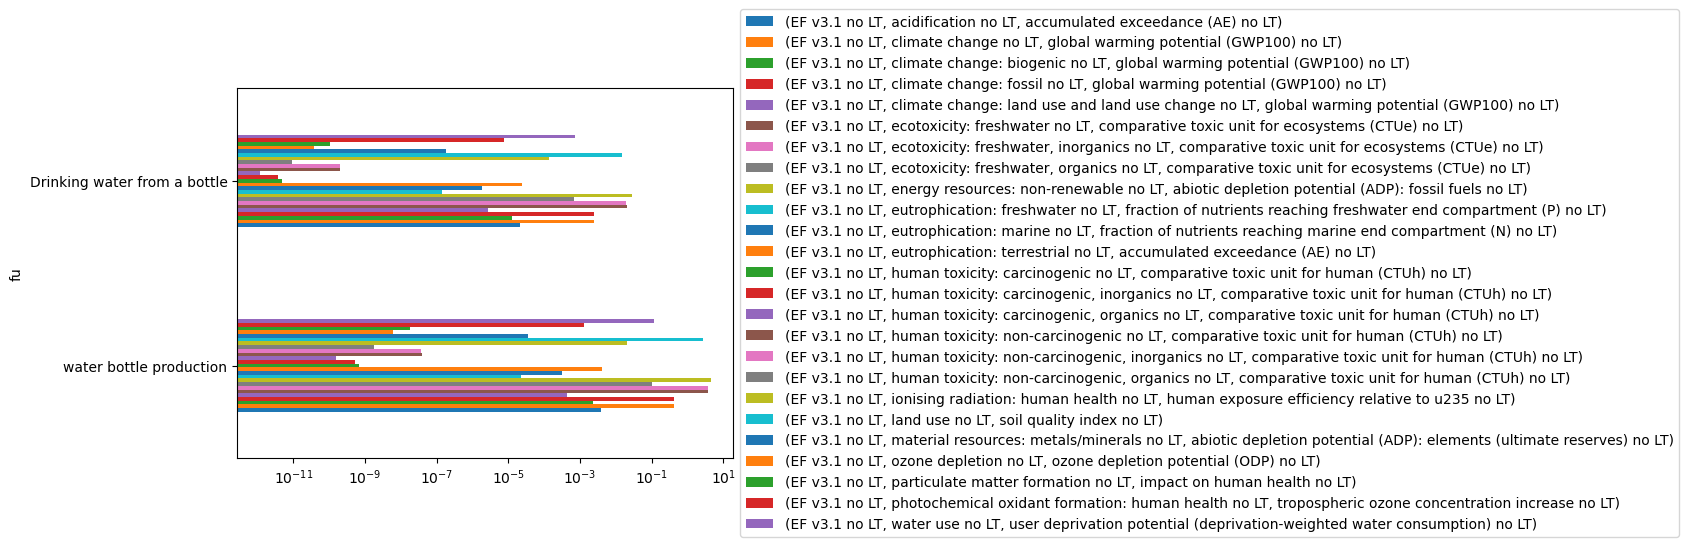

In [110]:
dfresults.plot(kind="barh")
ax = plt.subplot(111)
plt.xscale("log")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height, box.width, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Clearly, we are plotting a bunch of impact categories, and the plot itself is a bit difficult to interpret. You will have to choose what data you will want to represent and how; hopefully this is a good start in the right direction. 

#### Visualization with polyviz

Polyviz is a visualization package that handles Brightway outputs developed by Romain Sacchi. You can [find it on GitHub here](https://github.com/romainsacchi/polyviz/tree/main). You'll have to install this package and the d3 dependency. Installation instructions are in the package README. There's a few nice visualizations.

**NOTE**: Polyviz only works with BW2 (or it was tested with bw2data version 3.6.6, to be more precise). I will not change the versions of bw2data we have here, but for those of you who are comfortable enough with handling different versions of packages, you can try this out. If you try with other version of bw2data, like those found in BW25, you may run into an error that the dependency 'peewee' has not been found. <br><br>
<figure>
<img src="attachment:8008641a-5660-45ab-82c9-969cc47bdd4c.png" alt="drawing" style=" height: auto; 
                                                                                     width: auto; 
                                                                                     max-width: 800px; 
                                                                                     max-height: 800px;
                                                                                     display:block;
                                                                                     margin-left: auto;
                                                                                     margin-right: auto;"/>
    <figcaption style=" text-align: center "> Example taken from polyviz documentation </figcaption>
</figure>

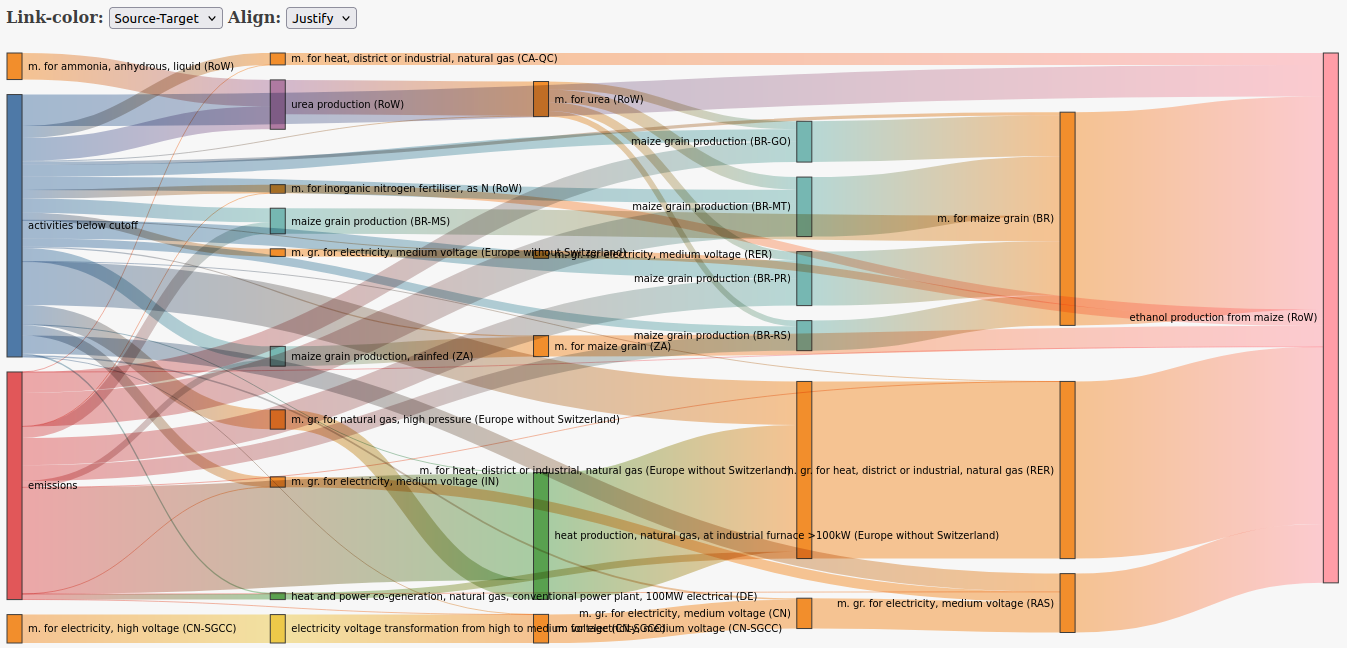

<a id='section5'></a>
### 5. Basic contribution analysis
Another thing we'd like to do with our LCA is to see from where impacts stem in the supply chain. We can do this with a contribution analysis.

In [67]:
import bw2analyzer as bwa

In [68]:
bwa.utils.print_recursive_calculation(
    ("Water bottle LCA", "act1"),
    ef_methods[2],
    amount=1,  # How much of the activity? (same as in our FU)
    max_level=2,  # How many levels deep in the CA do you want to go?
)

Fraction of score | Absolute score | Amount | Activity
0001 | 0.002328 |     1 | 'water bottle production' (unit, RER, None)
  0.866 | 0.002016 |  0.33 | 'treatment of aluminium scrap, post-consumer, prepared for recycling, at remelter' (kilogram, RER, No
    0.358 | 0.0008336 | 0.333 | 'market for aluminium scrap, post-consumer, prepared for melting' (kilogram, GLO, None)
    0.0378 | 8.802e-05 | 0.004565 | 'market for copper, cathode' (kilogram, GLO, None)
    0.0344 | 8.004e-05 | 0.04388 | 'market group for electricity, medium voltage' (kilowatt hour, RER, None)
    0.426 | 0.0009908 | 0.005005 | 'market for silicon, metallurgical grade' (kilogram, GLO, None)
  0.134 | 0.0003123 |  0.33 | 'impact extrusion of aluminium, deformation stroke' (kilogram, RER, None)
    0.134 | 0.0003123 | 0.1739 | 'market group for electricity, low voltage' (kilowatt hour, RER, None)


This is just one way of doing a contribution analysis. However, this way doesn't return something that can be readily used. Let's print our contribution analysis to an object. (Also, checkout the brightway2analyzer package in the documentation for more functions related to contribution analysis.)

In [71]:
# # Print the contribution analysis to dataframe
ca = bwa.utils.recursive_calculation_to_object(
    ("Water bottle LCA", "act1"),
    ef_methods[2],
    amount=1,  # How much of the activity? (same as in our FU)
    max_level=2,  # How many levels deep in the CA do you want to go?
)
pd.DataFrame(ca)

label  parent     score  fraction    amount  \
0      root    None  0.002328  1.000000  1.000000   
1    root_a    root  0.002016  0.865860  0.330000   
2  root_a_c  root_a  0.000834  0.358110  0.332963   
3  root_a_f  root_a  0.000088  0.037812  0.004565   
4  root_a_g  root_a  0.000080  0.034385  0.043885   
5  root_a_q  root_a  0.000991  0.425638  0.005005   
6    root_b    root  0.000312  0.134139  0.330000   
7  root_b_a  root_b  0.000312  0.134139  0.173910   

                                                name  \
0                            water bottle production   
1  treatment of aluminium scrap, post-consumer, p...   
2  market for aluminium scrap, post-consumer, pre...   
3                         market for copper, cathode   
4       market group for electricity, medium voltage   
5            market for silicon, metallurgical grade   
6  impact extrusion of aluminium, deformation stroke   
7          market group for electricity, low voltage   

                                                 key  
0                           (Water bottle LCA, act1)  
1  (ecoinvent-391-cutoff, 290d83cc6e3555585f97022...  
2  (ecoinvent-391-cutoff, 565119862217b3bf2c19acf...  
3  (ecoinvent-391-cutoff, 8b62f30ed586a5f23611ef1...  
4  (ecoinvent-391-cutoff, 0c02fccd63475e8f7e6b962...  
5  (ecoinvent-391-cutoff, 1ffe09506f70be4dcd98071...  
6  (ecoinvent-391-cutoff, aea60472ac8727f9a3a17b5...  
7  (ecoinvent-391-cutoff, 6f3bff7be2bf2f55a7afd20...

In case you forget the functional units, you can check with the following line of code:

In [72]:
mlca.func_units

[{'water bottle production' (unit, RER, None): 1},
 {'Drinking water from a bottle' (liter, RER, None): 1}]

<a id='section6'></a>
### 6. Brightway to LCA matrices correspondence

In [73]:
# Let's recalculate our LCA.
functional_unit = {bd.get_activity(("Water bottle LCA", "act1")): 1}
lca = bc.LCA(functional_unit, ef_gwp_key)
lca.lci()
lca.lcia()
lca.score

- the technosphere matrix:

In [96]:
print(lca.technosphere_matrix)

- the biosphere matrix:

In [98]:
print(lca.biosphere_matrix)

- the characterization matrix:

In [99]:
print(lca.characterization_matrix)

- the inventory:

In [100]:
print(lca.inventory)

- the characterized inventory:

In [101]:
print(lca.characterized_inventory)

- the demand and supply arrays:

In [102]:
print(lca.demand_array)  # Contains what we entered as final demand.
print(
    lca.demand_array.sum()
)  # Check that demand array only contains our demand by summing up the whole array
lca.supply_array  # equals the multiplication of our inverted transaction matrix by the final demand, i.e. (Ae-1)*y

<a id='section7'></a>
### 7. Deleting processes, databases, projects

There are more ways than what is shown here to delete your data.

To delete an activity:

In [130]:
# for act in wb:
#     if act['name']=='Drinking water from a bottle':
#         act.delete()

In [135]:
# Check if your activity has been deleted
# wb.search('Drinking water from a bottle') # Should return an empty list

To delete a database:

In [131]:
# del bd.databases[<the_db_name>]

# OR

# bd.Database('Water bottle LCA').deregister()

# Check the db has been deleted
# bd.databases

To delete a project: 

In [113]:
# bd.projects.delete_project(<the_project_name>,delete_dir=True)

The original code for such a comparative static LCA can be found [here](https://nbviewer.jupyter.org/github/PascalLesage/Shared-BW2-notebooks/blob/master/Comparative%20static%20LCA%20in%20Brightway2.ipynb). Here, we want to look at **bananas instead of dairy**. So let's see which activities we have in ecoinvent:

In [ ]:
bananas_unsorted = [act for act in eidb if "banana" in act["name"]]
bananas = sorted(bananas_unsorted, key=lambda k: k["name"])
bananas

Of these activities, we now select the banana production processes for Colombia, Costa Rica, and India, and we select three impact methods on climate change, land use, and water stress.

In [ ]:
banana_CO = [
    act for act in eidb if "banana" in act["name"] and "CO" in act["location"]
][0]
banana_CR = [
    act for act in eidb if "banana" in act["name"] and "CR" in act["location"]
][0]
banana_IN = [
    act for act in eidb if "banana" in act["name"] and "IN" in act["location"]
][0]

inventory = [banana_CO, banana_CR, banana_IN]

methods = [
    [
        m
        for m in bw.methods
        if "ReCiPe Midpoint (H)" in str(m) and "climate change" in str(m)
    ][0],
    [
        m
        for m in bw.methods
        if "ReCiPe Midpoint (H)" in str(m)
        and "agricultural land occupation" in str(m)
        and not "w/o LT" in str(m)
    ][0],
    [
        m
        for m in bw.methods
        if "ReCiPe Midpoint (H)" in str(m)
        and "water depletion" in str(m)
        and not "w/o LT" in str(m)
        and not "V1.13" in str(m)
    ][0],
]

print("Let's compare\n{},\n{}, and\n{}".format(banana_CO, banana_CR, banana_IN))

In [ ]:
results = []

for banana in inventory:
    lca = bw.LCA({banana: 1})
    lca.lci()
    for method in methods:
        lca.switch_method(method)
        lca.lcia()
        results.append(
            (
                banana["name"],
                banana["location"],
                method[1].title(),
                lca.score,
                bw.methods.get(method).get("unit"),
            )
        )
results

We should probably present these results in a nicer form. Let's use `pandas` for that:

In [ ]:
results_df = pd.DataFrame(
    results, columns=["Name", "Location", "Method", "Score", "Unit"]
)
results_df = pd.pivot_table(
    results_df, index=["Name", "Location"], columns=["Method", "Unit"], values="Score"
)
results_df

In [ ]:
df = pd.DataFrame.from_dict(results).T
df

We can also normalise these results, which may help to get a better overview:

In [ ]:
NormResults_df = results_df / results_df.max()
NormResults_df

Sidenote: We can certainly run this kind of comparative LCA with our own product systems, e.g. the bottle production from above. We would just have to select the respective reference flow...

A faster way of running comparative LCAs is through calculation setups. So, let's get familiar with them! This can be done best by just employing random activities as funcitonal units and selecting the LCIA methods which can be applied to the present biosphere flows (only a subset of these ones). Due to computation time, we decide to use the FORWAST database instead of ecoinvent - although this certainly works, too.

In [ ]:
# define the functional units and LCIA methods; taken from example notebook
functional_units = [{fw.random(): 1} for _ in range(20)]

import random

all_forwast_flows = {exc.input for ds in fw for exc in ds.biosphere()}
suitable_methods = [
    method
    for method in bw.methods
    if {cf[0] for cf in Method(method).load()}.intersection(all_forwast_flows)
]

print("Can use {} of {} LCIA methods".format(len(suitable_methods), len(bw.methods)))
chosen_methods = random.sample(suitable_methods, 8)

In [ ]:
functional_units

In [ ]:
chosen_methods

Now we come to the actual calculation setup which gets defined through our functional units and the chosen LCIA methods:

In [ ]:
my_calculation_setup = {"inv": functional_units, "ia": chosen_methods}

In [ ]:
calculation_setups["set of calculation setups"] = my_calculation_setup

In [ ]:
mlca = MultiLCA("set of calculation setups")
mlca.results

Hm, does not seem to be so difficult. Therefore, let's try it on a better chosen example.

Let's decide on our LCIA method selection:

In [ ]:
[
    m
    for m in bw.methods
    if "ReCiPe" in str(m) and "Midpoint (H)" in str(m) and "land" in str(m)
][:3]

Now a different way fo setting up our list of selected LCIA methods:

In [ ]:
land_methods = [
    m
    for m in bw.methods
    if "ReCiPe" in str(m) and "Midpoint (H)" in str(m) and "land" in str(m)
][:3]
methods = land_methods + [
    [
        m
        for m in bw.methods
        if "ReCiPe" in str(m)
        and "Midpoint (H)" in str(m)
        and "climate change" in str(m)
    ][0],
    [
        m
        for m in bw.methods
        if "ReCiPe" in str(m)
        and "Midpoint (H)" in str(m)
        and "water depletion" in str(m)
    ][0],
]
print(methods)

And now we calculate the results for one functional unit (our banana production from above) and multiple LCIA methods:

**One functional unit, multiple impact categories**

In [ ]:
all_scores = {}
banana_lca = bw.LCA({banana_CO: 1}, methods[0])
banana_lca.lci()
banana_lca.lcia()
for category in methods:
    banana_lca.switch_method(category)
    banana_lca.lcia()
    all_scores[category] = {}
    all_scores[category]["score"] = banana_lca.score
    all_scores[category]["unit"] = bw.Method(category).metadata["unit"]
    print(
        "The score is {:f} {} for impact category {}".format(
            banana_lca.score,
            bw.Method(category).metadata["unit"],
            bw.Method(category).name,
        )
    )

We can certainly present these results also in a nice table:

In [ ]:
df = pd.DataFrame.from_dict(all_scores).T
df

And now let's visualise the results only for the scores that have the same unit, i.e. in this example agricultural and urban land occupation.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df_m2 = df[df["unit"] == "square meter-year"]
df_m2

In [ ]:
df_m2.plot(kind="barh")

And of course we can find the relative contributions for our selected functional unit, too:

In [ ]:
banana_lca_unitProcessContribution = banana_lca.characterized_inventory.sum(axis=0).A1
banana_lca_unitProcessRelativeContribution = (
    banana_lca_unitProcessContribution / banana_lca.score
)
banana_lca_unitProcessRelativeContribution

And now we calculate the results for multiple functional units and multiple LCIA methods:

**Multiple functional units, multiple impact categories**

In [ ]:
# Set up the production system
prod_sys = [{banana_CO.key: 1}, {banana_CR.key: 1}, {banana_IN.key: 1}]
prod_sys

In [ ]:
bw.calculation_setups["multiLCA"] = {"inv": prod_sys, "ia": methods}
bw.calculation_setups["multiLCA"]
myMultiLCA = bw.MultiLCA("multiLCA")
myMultiLCA.results

df_impact = pd.DataFrame(data=myMultiLCA.results, columns=methods)
df_impact

Just in case we cannot remember for some reason our functional units, we can easily find their definition again:

In [ ]:
myMultiLCA.func_units

The same certainly goes for our chosen LCIA methods:

In [ ]:
myMultiLCA.methods

**Continue, or back to [table of contents](#section0)?**
***

### Deleting data

### Uncertainty information in Brightway

Uncertainty is stored at the level of the exchanges - remember this! So, let's have a look at a random ecoinvent exchange:

In [ ]:
[exc for exc in eidb.random().exchanges()][0].as_dict()

The *necessary* uncertainty information of an exchange is described in the following fields:  
  - **'uncertainty type'** : type of probability distribution function that the exchange follows. For example, the uncertainty type = 2 indicates a `lognormal`  distribution.  
  - **'loc', 'scale', 'shape', 'minimum', 'maximum'**: parameters of the distribution function, which are respectively the location (mean $\mu$, mode, offset, or median), scale (e.g. standard deviation $\sigma$), and shape as well as minimum and maximum of the underlying distribution. Mind that different distribution functions require different parameters - not all parameters have to be defined for each distribution.

Some *additional* uncertainty related information ('scale without pedigree', 'pedigree') are also there, but are not directly used in the calculation of the uncertainty. They are also specific to ecoinvent.

Uncertainty in Brightway is dealt with using a Python package called `stats_arrays` (see [here](http://stats-arrays.readthedocs.io/en/latest/)), developed by Chris Mutel in the context of the development of Brightway but applicable to any stochastic model in Python. Have a look at it to see which probability distribution functions are available. And then, let's import this package!

In [ ]:
import stats_arrays

Just to give a brief example of how the uncertainty information "works", let's have a look at the lognormal distribution. As a reminder:   
  - a random variable $X$ is a lognormal if its natural logarithm $ln(X)$ is normally distributed  
  - the natural logarithm of the *median* of the lognormal distribution is equal to the median (=mean) of the underlying distribution  

Taking the deterministic amount `amount` to be the median, we should have `loc` = `ln('amount')`. Let's do this for the first exchange of a random ecoinvent activity that has a lognormal distribution:

In [ ]:
# run this cell again if the output is empty
e = [exc for exc in eidb.random().exchanges() if exc["uncertainty type"] == 2][0]
e.as_dict()

In [ ]:
e["loc"] == np.log(e["amount"])

### Basic Monte Carlo simulation

**One functional unit, one impact category**

In [ ]:
# MC simulation with 10 iterations for our banana production and the IPCC GWP100a method
mc = bw.MonteCarloLCA({banana_CO: 1}, ("IPCC 2013", "climate change", "GWP 100a"))
scores = [next(mc) for _ in range(10)]
scores

# or this way:
# for _ in range(10):
#    print(next(mc))

Let's print the results of our MC:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(scores, bins=40)

Well, this doesn't really look like anything yet. We should increase the number of iterations - which yields more robust results. Around 10,000 iterations is a good starting point. However, this takes a while, so we will just give it a try with 1000 now. See for yourself how long it would take for a higher number of iterations.

In [ ]:
# define the number of iterations
n_runs = 1000

In [ ]:
%%time
values = [next(mc) for _ in range(n_runs)]

In [ ]:
plt.hist(values, bins=40)

We can also **run the MCs in parallel** which speeds up the computation time - see the following and compare the calculation times!

In [ ]:
# We can also create parallel Monte Carlo that will run simultations on multiple workers simultaneoulsy
bw.ParallelMonteCarlo?

In [ ]:
pmc = bw.ParallelMonteCarlo(mc.demand, mc.method, iterations=n_runs)

In [ ]:
%%time
values = pmc.calculate()

In [ ]:
plt.hist(values, bins=40)

**One functional unit, multiple impact categories**

In [ ]:
# define the function for MC simulation
def multiImpactMonteCarloLCA(functional_unit, list_methods, iterations):
    # Step 1
    MC_lca = bw.MonteCarloLCA(functional_unit)
    MC_lca.lci()
    # Step 2
    C_matrices = {}
    # Step 3
    for method in list_methods:
        MC_lca.switch_method(method)
        C_matrices[method] = MC_lca.characterization_matrix
    # Step 4
    results = np.empty((len(list_methods), iterations))
    # Step 5
    for iteration in range(iterations):
        next(MC_lca)
        for method_index, method in enumerate(list_methods):
            results[method_index, iteration] = (
                C_matrices[method] * MC_lca.inventory
            ).sum()
    return results


# define the LCIA methods, functional unit, and the number of iterations
ILCD = [
    method
    for method in bw.methods
    if "ILCD" in str(method) and "no LT" not in str(method)
]
fu = {banana_CO: 1}
iterations = 100

# let it run!
test_results = multiImpactMonteCarloLCA(fu, ILCD, iterations)
test_results

In [ ]:
ILCD

In [ ]:
# we can get the plots for all 34 ILCD methods (--> type: len(ILCD)) by changing the index in the brackets
plt.hist(test_results[33], bins=40)

If you are interested in applying a **sensitivity analysis**, check out this [notebook](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%202%20PM/Sensitivity%20analysis%20-%20example%20with%20PAWN%20indices.ipynb).

---

At this point, it's worth pointing again at the **[Activity browser](https://github.com/LCA-ActivityBrowser/activity-browser)** and **[LCOPT](https://lcopt.readthedocs.io/en/latest/)**. These two Brightway2-extensions serve different purposes and require different settings, so check them out if you're curious.

---

And now, last but not least, here's our reward for finishing this notebook :)

In [ ]:
from IPython.display import Image

Image(
    url="https://cdn.shopify.com/s/files/1/1869/0319/products/ART-dabbing-unicorn_color-powder-blue_1024x1024.jpg?v=1523903512"
)

**Back to [table of contents](#section0)?**
***

#### Troubleshooting

Add his part from Section 1